In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
rawdf = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/707_Crashes/Airplane_Crashes_and_Fatalities_Since_1908.csv', index_col= 'index', parse_dates=[['Date', 'Time']])

In [14]:
rawdf['Date_Time'] = pd.to_datetime(rawdf['Date_Time'], errors = 'coerce')
rawdf.tail()


,Date_Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
index,,,,,,,,,,,,
5263,2009-05-20 06:30:00,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,NaT,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,2009-06-01 00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,2009-06-07 08:30:00,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,NaT,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


Top 15 Common Boeing Plane To Crash

<function matplotlib.pyplot.show(close=None, block=None)>

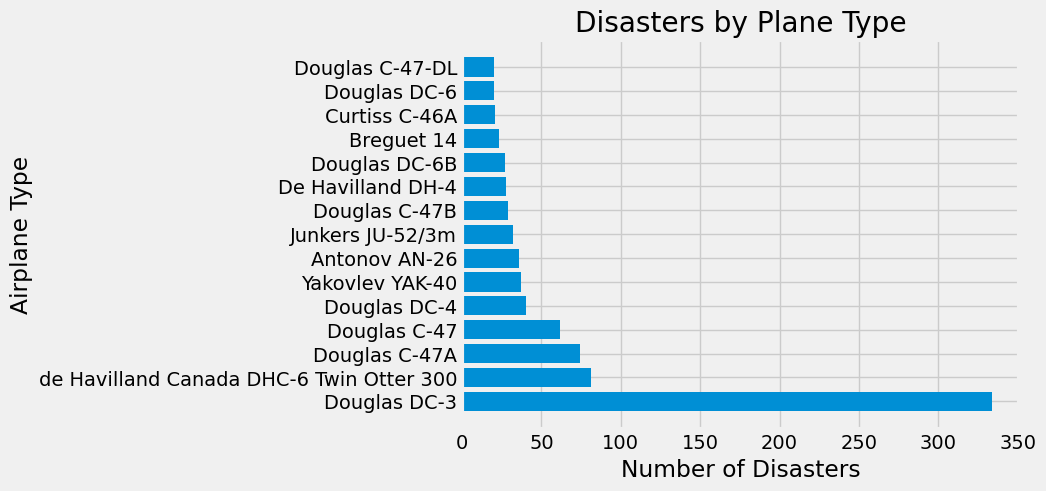

In [11]:
planecount = rawdf['Type'].value_counts().head(15)

plt.barh(planecount.index,planecount)

plt.style.use('fivethirtyeight')
plt.xlabel('Number of Disasters')
plt.ylabel('Airplane Type')
plt.title('Disasters by Plane Type')
plt.show

Disasters by Hour

<function matplotlib.pyplot.show(close=None, block=None)>

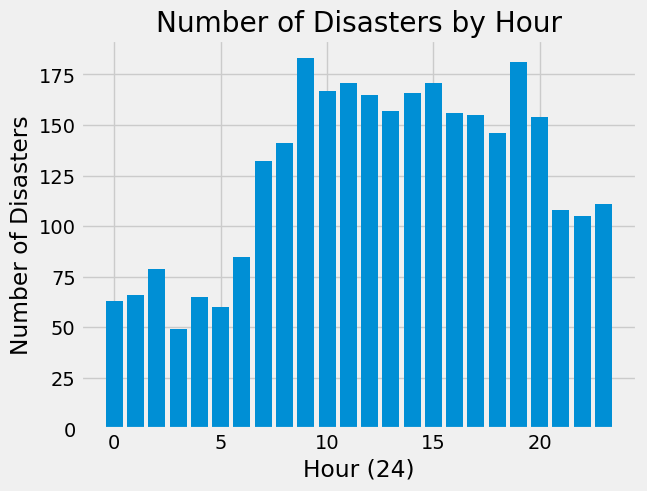

In [12]:
nonatimedf = rawdf.loc[rawdf['Date_Time'].dropna().index]
nonatimedf['Date_Time'] = pd.to_datetime(nonatimedf['Date_Time'])
nonatimedf['Hour'] = nonatimedf['Date_Time'].dt.hour
disastersHour = nonatimedf['Hour'].value_counts().sort_index()

plt.style.use('fivethirtyeight')
plt.bar(disastersHour.index,disastersHour)
plt.xlabel('Hour (24)')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters by Hour')
plt.show

Disasters by City

<function matplotlib.pyplot.show(close=None, block=None)>

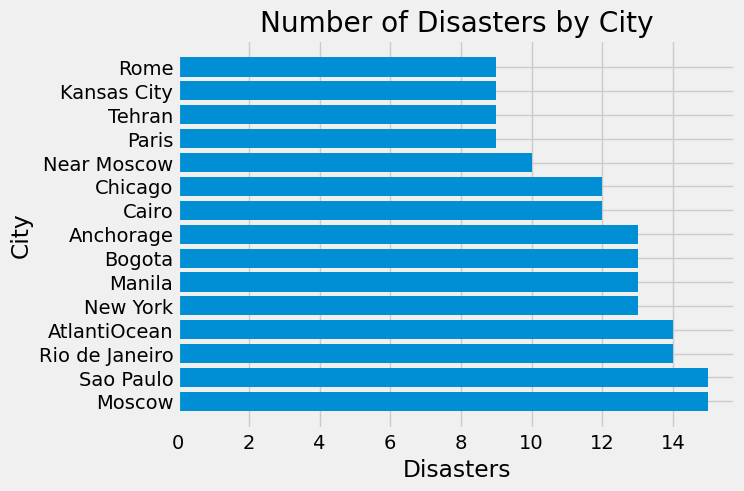

In [13]:
def getCity(address):
    return address.split(',')[0]

rawdf['Location'] = rawdf['Location'].astype('string')
citydf = rawdf.copy()
citydf = citydf.loc[citydf['Location'].dropna().index]
citydf['City'] = citydf['Location'].apply(lambda x: getCity(x))
citydisaster = citydf['City'].value_counts().head(15)

plt.style.use('fivethirtyeight')
plt.barh(citydisaster.index,citydisaster)
plt.xlabel('Disasters')
plt.ylabel('City')
plt.title('Number of Disasters by City')
plt.show

In [38]:
def getDepartureCity(route):
    return route.split('-')[0]
def getArrivalCity(route):
    if route.split('-')[0] != None or route.split('-')[1] != None:
        if print(len(route.split('-'))) > 0:
            return route.split('-')[1]
        else:
            return route.split('-')[0]
    else: 
        return np.nan
    




routedf = rawdf.copy()
routedf = routedf.loc[routedf['Route'].dropna().index]
routedf['Route'] = routedf['Route'].astype('string')
routedf['Route'].value_counts()
routedf['Departure City'] = routedf['Route'].apply(lambda x: getDepartureCity(x))
routedf['Arrival City'] = routedf['Route'].apply(lambda x: getArrivalCity(x))


1


TypeError: '>' not supported between instances of 'NoneType' and 'int'